In [1]:
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation
from scipy.stats import norm
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)

In [8]:
# Set Current Directory
currentPath = os.getcwd()
subFolder = "/ml-100k/"
os.chdir(currentPath+subFolder)

In [60]:
def matrix_factorization(R, P, Q, K=2, steps=5000, alpha=0.0002, beta=0.02, tol=0.001):
    n, m = R.shape
    Q = Q.T
    for _ in range(steps):
        for i in range(n):
            for j in range(m):
                if R[i][j] > 0:
                    eij = R[i][j] - np.dot(P[i,:], Q[:,j])
                    for k in range(K):
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])
        eR = np.dot(P, Q)
        e = 0
        for i in range(n):
            for j in range(m):
                if R[i][j] > 0:
                    e = e + (R[i][j] - np.dot(P[i,:], Q[:,j])) ** 2
                    for k in range(K):
                        e = e + (beta/2) * (P[i][k] ** 2 + Q[k][j] ** 2) # total error
        if e < tol:
            break
    return P, Q.T

In [5]:
def ImportFile(fileName,feature,sep,crange):
    if sep == None:
        sep = '|'
    if crange == None:
        df = pd.read_csv(fileName, sep=sep,names=feature,encoding='latin-1')
    else:
        df = pd.read_csv(fileName, sep=sep,names=feature,usecols=range(crange),encoding='latin-1')
    return df

In [6]:
ratingFeature = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

In [9]:
ratingDf = ImportFile('u.data',ratingFeature,'\t',4)
print('total user rating genre : ',len(ratingDf))
ratingDf.info()
ratingDf.head()

total user rating genre :  100000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user_id           100000 non-null int64
movie_id          100000 non-null int64
rating            100000 non-null int64
unix_timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB


,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [219]:
pivotRatingDf = ratingDf.pivot_table(index=['movie_id'],columns=['user_id'],values='rating').reset_index(drop=True)
pivotRatingDf

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
1,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,2.0,5.0,3.0,4.0,4.0,...,NaN,NaN,4.0,NaN,4.0,NaN,4.0,4.0,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
8,5.0,NaN,NaN,NaN,NaN,4.0,5.0,NaN,NaN,4.0,...,NaN,1.0,4.0,5.0,3.0,5.0,3.0,NaN,NaN,3.0
9,3.0,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(52,0.5,'user_id')

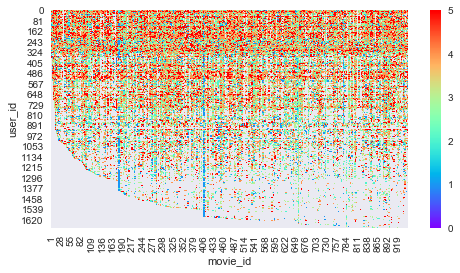

In [193]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(pivotRatingDf, 0,5, cmap='rainbow')
ax.set_xlabel('movie_id')
ax.set_ylabel('user_id')

In [194]:
pivotRatingDf.fillna(0,inplace=True)
pivotRatingDf.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,5.0,4.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,4.0,...,2.0,3.0,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0
1,3.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,...,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
4,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(52,0.5,'user_id')

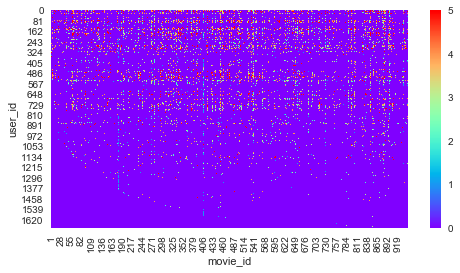

In [195]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(pivotRatingDf, 0,5, cmap='rainbow')
ax.set_xlabel('movie_id')
ax.set_ylabel('user_id')

In [232]:
rand_user_size =15
rand_movie_size = 50
rand_user_id = np.random.choice(50, rand_user_size)
rand_movie_id = np.random.choice(150, rand_movie_size)

In [233]:
rand_rating_matrix = pd.DataFrame(pivotRatingDf,rand_user_id,rand_movie_id)
rand_rating_matrix

,31,82,80,85,12,101,41,38,102,93,...,7,62,1,93,15,102,66,68,7,86
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
14,NaN,3.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,...,NaN,2.0,5.0,5.0,4.0,NaN,3.0,NaN,NaN,NaN
10,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,...,3.0,NaN,2.0,NaN,NaN,3.0,NaN,NaN,3.0,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN
25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,5.0,NaN,4.0,NaN,4.0,4.0,5.0,NaN
24,NaN,2.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,4.0,NaN,3.0,NaN,NaN,4.0,3.0,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(52,0.5,'movie_id')

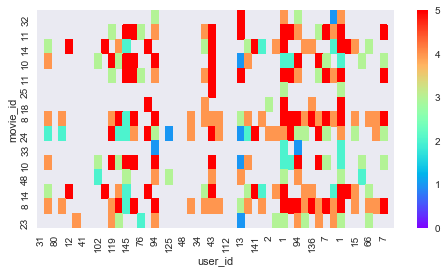

In [234]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(rand_rating_matrix, 0,5, cmap='rainbow')
ax.set_xlabel('user_id')
ax.set_ylabel('movie_id')

In [224]:
rand_rating_matrix

,96,23,57,132,16,111,148,120,69,121,...,33,120,94,38,115,100,26,94,39,56
27,NaN,3.0,4.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,4.0,5.0,NaN,NaN,NaN,5.0,5.0,...,NaN,NaN,4.0,NaN,5.0,NaN,NaN,4.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN
49,5.0,4.0,5.0,3.0,NaN,NaN,5.0,4.0,5.0,5.0,...,NaN,4.0,5.0,NaN,5.0,NaN,4.0,5.0,NaN,5.0


In [199]:
pd.DataFrame(Vt).shape

(30, 1682)

In [235]:
na = rand_rating_matrix.as_matrix()
R = na

In [229]:
na = rand_rating_matrix.as_matrix()


In [249]:
n, m = R.shape
K = 2 # latent variable

P = np.random.rand(n, K) # randomly create P, Q first
Q = np.random.rand(m, K)
P, Q = matrix_factorization(R, P, Q, K)
Rhat = np.dot(P, Q.T)


In [237]:
type(Rhat)

numpy.ndarray

In [203]:
len(R)

30

In [204]:
rDf = pd.DataFrame(R)
rDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,2.0,5.0,0.0,0.0,3.0,5.0,4.0,3.0,0.0,...,0.0,0.0,5.0,5.0,0.0,5.0,0.0,4.0,5.0,4.0


In [250]:
rhDf = pd.DataFrame(Rhat)
rhDf.head(5)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.573851,2.320430,1.480068,3.396446,3.997141,3.617850,1.714713,1.556769,1.235430,3.943680,...,4.171422,1.291490,4.342542,4.063004,3.345708,1.268129,2.387127,2.489822,4.170676,0.559901
1,1.693610,3.686329,1.495993,3.991782,5.845706,5.208968,1.900870,2.511474,2.377151,5.989176,...,5.052290,3.634820,4.962287,5.668897,4.203117,2.404691,3.788549,4.064247,5.051677,1.412491
2,0.966537,2.977333,1.647245,3.944605,4.980231,4.483501,1.957771,2.008768,1.707214,4.978882,...,4.888730,2.123213,5.001754,4.981875,3.965458,1.741983,3.061812,3.226717,4.887940,0.872394
3,2.802373,3.748834,0.340022,2.120342,5.248268,4.553524,0.796114,2.606995,2.989957,5.709637,...,2.963130,5.883025,2.371817,4.679738,2.738484,2.984254,3.847624,4.283455,2.963299,2.158816
4,1.693740,3.686515,1.496019,3.991902,5.845971,5.209199,1.900918,2.511602,2.377295,5.989461,...,5.052453,3.635094,4.962425,5.669136,4.203264,2.404834,3.788739,4.064458,5.051840,1.412592


Text(52,0.5,'movie_id')

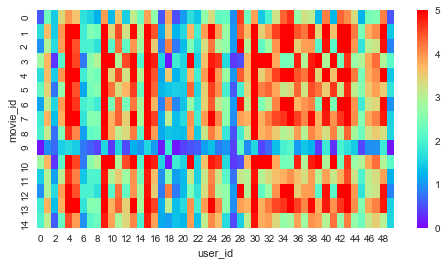

In [251]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(rhDf, 0,5, cmap='rainbow')
ax.set_xlabel('user_id')
ax.set_ylabel('movie_id')

Text(52,0.5,'movie_id')

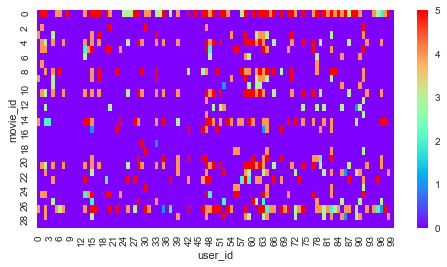

In [78]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(rDf, 0,5, cmap='rainbow')
ax.set_xlabel('user_id')
ax.set_ylabel('movie_id')

In [206]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [82]:
rms = sqrt(mean_squared_error(rDf, rhDf))
print(rms)

3.0902648359233105


In [207]:
R = pivotRatingDf.as_matrix()
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[  3.14103924e+00,   2.14103924e+00,  -1.85896076e+00, ...,
          3.14103924e+00,  -1.85896076e+00,  -1.85896076e+00],
       [  2.55461294e+00,  -4.45387063e-01,  -4.45387063e-01, ...,
         -4.45387063e-01,  -4.45387063e-01,   4.55461294e+00],
       [  3.71049841e+00,  -2.89501591e-01,  -2.89501591e-01, ...,
         -2.89501591e-01,  -2.89501591e-01,  -2.89501591e-01],
       ..., 
       [ -2.12089077e-03,  -2.12089077e-03,  -2.12089077e-03, ...,
         -2.12089077e-03,  -2.12089077e-03,  -2.12089077e-03],
       [ -3.18133616e-03,  -3.18133616e-03,  -3.18133616e-03, ...,
         -3.18133616e-03,  -3.18133616e-03,  -3.18133616e-03],
       [ -3.18133616e-03,  -3.18133616e-03,  -3.18133616e-03, ...,
         -3.18133616e-03,  -3.18133616e-03,  -3.18133616e-03]])

In [208]:
pd.DataFrame(R_demeaned).shape

(1682, 943)

In [209]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 30)

In [210]:
sigma = np.diag(sigma)
sigma

array([[  66.88845618,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ],
       [   0.        ,   67.27491203,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ,
         

In [211]:
pd.DataFrame(U).shape

(1682, 30)

In [212]:
pd.DataFrame(Vt).shape

(30, 943)

In [213]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

In [214]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivotRatingDf.columns)
preds_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
0,3.475027,0.016841,-1.055113,-1.582840,1.791982,1.828516,-0.863067,-0.879713,-1.502304,-0.354111,...,-0.533584,0.778229,1.383403,-0.764006,2.973000,0.655285,-1.533653,0.692783,-0.664948,-0.833864
1,1.913673,-0.524388,-0.355248,-0.615288,0.966755,-0.177802,1.039670,0.986107,-0.411947,-0.709358,...,0.095249,-0.452885,-0.687351,-0.355792,-0.851551,-0.346049,-0.588569,-0.255458,-0.283424,1.639097
2,1.175996,-0.191423,-0.312372,-0.241541,-0.017517,-0.044945,0.612393,-0.527672,-0.139117,-0.237994,...,0.001054,-0.035444,1.278162,-0.441744,0.548091,-0.187012,-0.405421,-0.051679,-0.554796,1.154723
3,1.869198,-0.341131,-1.052425,-0.845502,0.751079,0.795981,2.764609,0.796741,-1.001662,1.921488,...,1.978849,-0.910133,-0.816310,-0.697887,-0.938242,-0.918749,1.561959,-0.885868,-0.932170,1.504798
4,0.759960,-0.244624,-0.392199,-0.309562,0.186538,-0.743648,1.267241,-0.518688,-0.215316,0.644789,...,-0.295634,-0.045130,-0.564102,-0.244665,-0.011045,0.101313,-0.006433,-0.326296,-0.347403,0.895043


Text(52,0.5,'movie_id')

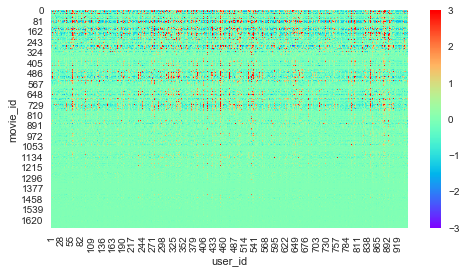

In [215]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(preds_df, -3,3, cmap='rainbow')
ax.set_xlabel('user_id')
ax.set_ylabel('movie_id')

Text(52,0.5,'movie_id')

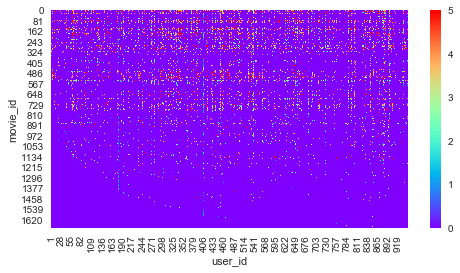

In [216]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
sns.heatmap(pivotRatingDf, 0,5, cmap='rainbow')
ax.set_xlabel('user_id')
ax.set_ylabel('movie_id')